In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno





#### Preprocesamos el conjunto de prueba.
En terminos generales , se codifican las variables para que el algoritmo pueda interpretarlas y realizar la predicción utilizando las mismas columnas que el conjunto de datos original manteniendo la cantidad de filas. 

In [2]:
archivo_csv="properties_colombia_test.csv"
df_test=pd.read_csv(archivo_csv)


In [3]:
df_test[df_test.duplicated()] #verifico duplicados

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry


In [4]:
df_test.isnull().sum()# verifico nulos

Unnamed: 0             0
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                16417
lon                16417
l1                     0
l2                     0
l3                  3657
l4                 50776
l5                 56798
l6                 63486
rooms              56740
bedrooms           52447
bathrooms          13796
surface_total      63536
surface_covered    62545
currency              17
price_period       53729
title                  0
description           27
property_type          0
operation_type         0
geometry               0
dtype: int64

In [5]:
df_test.isnull().sum()# verifico nulos

Unnamed: 0             0
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                16417
lon                16417
l1                     0
l2                     0
l3                  3657
l4                 50776
l5                 56798
l6                 63486
rooms              56740
bedrooms           52447
bathrooms          13796
surface_total      63536
surface_covered    62545
currency              17
price_period       53729
title                  0
description           27
property_type          0
operation_type         0
geometry               0
dtype: int64

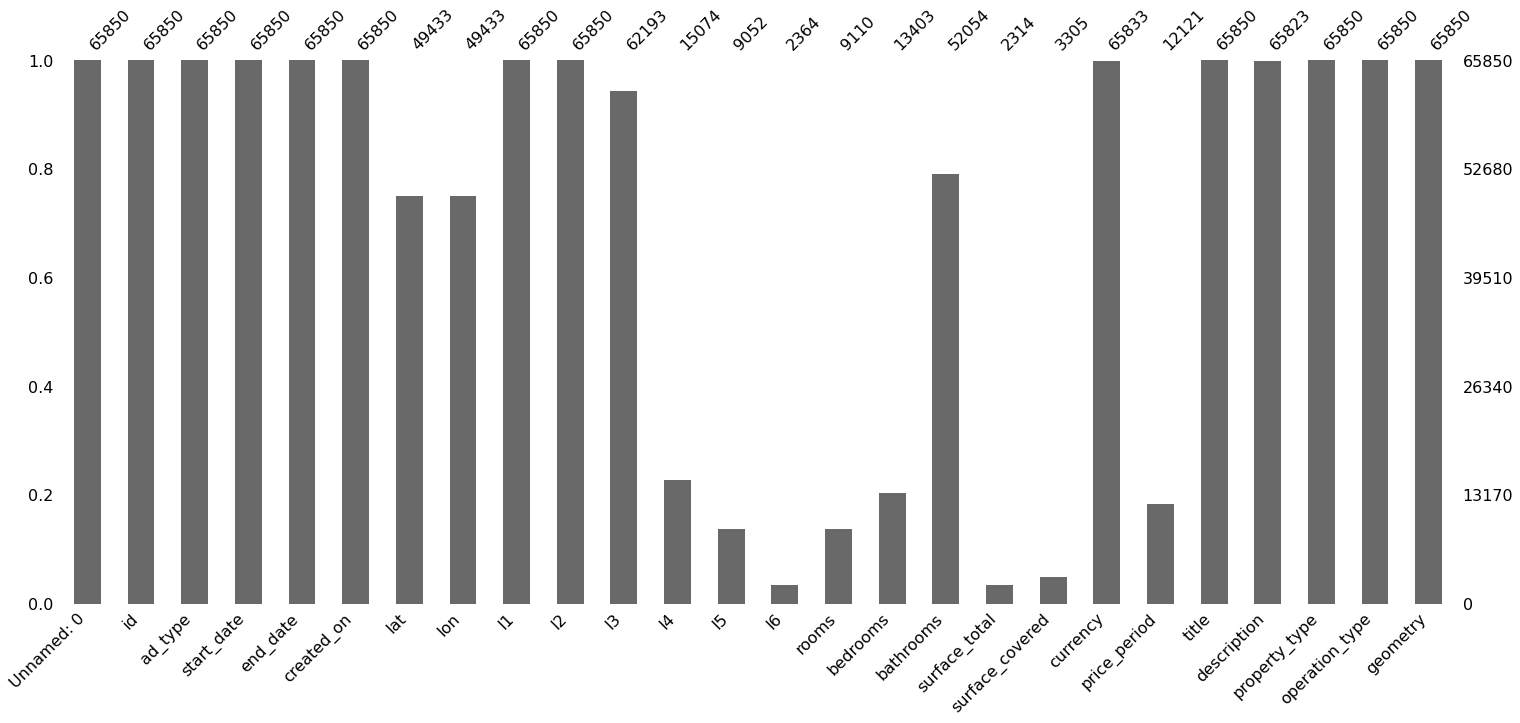

In [6]:
msno.bar(df_test)
plt.show()

In [7]:


#verifico faltantes 
print('Porcentaje de valores faltantes de la variable lat:', (df_test.lat.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable lon:', (df_test.lon.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable l3:', (df_test.l3.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable l4:', (df_test.l4.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable l5:', (df_test.l5.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable l6:', (df_test.l6.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable rooms:', (df_test.rooms.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable bedrooms:', (df_test.bedrooms.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable bathrooms:', (df_test.bathrooms.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable surface_total:', (df_test.surface_total.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable surface_covered:', (df_test.surface_covered.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable currency:', (df_test.currency.isnull().sum()/len(df_test)) * 100)
print('Porcentaje de valores faltantes de la variable price_period:', (df_test.price_period.isnull().sum()/len(df_test)) * 100)


Porcentaje de valores faltantes de la variable lat: 24.93090356871678
Porcentaje de valores faltantes de la variable lon: 24.93090356871678
Porcentaje de valores faltantes de la variable l3: 5.553530751708428
Porcentaje de valores faltantes de la variable l4: 77.1085801063022
Porcentaje de valores faltantes de la variable l5: 86.25360668185269
Porcentaje de valores faltantes de la variable l6: 96.41002277904327
Porcentaje de valores faltantes de la variable rooms: 86.16552771450266
Porcentaje de valores faltantes de la variable bedrooms: 79.6461655277145
Porcentaje de valores faltantes de la variable bathrooms: 20.950645406226272
Porcentaje de valores faltantes de la variable surface_total: 96.48595292331056
Porcentaje de valores faltantes de la variable surface_covered: 94.98101746393318
Porcentaje de valores faltantes de la variable currency: 0.025816249050873197
Porcentaje de valores faltantes de la variable price_period: 81.59301442672741


In [8]:
df_test.drop(columns=["id"],inplace=True)
df_test.drop(columns=["ad_type"],inplace=True)
df_test.drop(columns=["Unnamed: 0"],inplace=True)#borro columna Unnamed: 0 que no me aporta ningun valor 
df_test.drop(columns=["l1"],inplace=True)# borro columna ya que tiene una sola categoría de país.
df_test.drop(columns=["l4", "l5","l6"],inplace=True)
df_test.drop(columns=["title", "description"],inplace=True)#borro columna Unnamed: 0 que no me aporta ningun valor 
df_test.drop(columns=["end_date"],inplace=True)#borro columna end_date
df_test.drop(columns=["bedrooms","surface_total","surface_covered"],inplace=True)#borro columna Unnamed: 0 que no me aporta ningun valor
df_test.drop(columns=["price_period"],inplace=True)
df_test.drop(columns=["currency"],inplace=True) # del total solo 8 registros estan en dolares por lo tanto asumo que price esta en pesos CO
df_test.drop(columns=["operation_type"],inplace=True) # tipo operacion sabemos que es venta asi que eliminamos
df_test.drop(columns=["geometry"],inplace=True) # eliminamos geomtry porque ya tenemos las coordenadas

In [9]:
df_test["start_date"]= pd.to_datetime(df_test["start_date"], yearfirst=True) #convierto a datatime
df_test["created_on"]= pd.to_datetime(df_test["created_on"], yearfirst=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler  #normalizo las fechas
scaler = MinMaxScaler()
df_test['start_date']= scaler.fit_transform(df_test['start_date'].values.reshape(-1,1))
df_test['created_on']= scaler.fit_transform(df_test['start_date'].values.reshape(-1,1))

In [11]:
from sklearn.preprocessing import PowerTransformer #normalizo variable numerica
pt = PowerTransformer()
df_test['lat'] = pt.fit_transform(df_test['lat'].values.reshape(-1, 1))
df_test['lon'] = pt.fit_transform(df_test['lon'].values.reshape(-1, 1))
df_test['rooms'] = pt.fit_transform(df_test['rooms'].values.reshape(-1, 1))
df_test['bathrooms'] = pt.fit_transform(df_test['bathrooms'].values.reshape(-1, 1))

In [12]:
from sklearn.preprocessing import OneHotEncoder #codificacion variables categoricas

cat_encoded = df_test[["l2","l3","property_type"]]
ohe = OneHotEncoder(handle_unknown = 'ignore')
df_cat_encoded = pd.DataFrame(ohe.fit_transform(cat_encoded).toarray())

In [13]:
df_test = df_test.join(df_cat_encoded)
df_test.drop(columns=["l2","l3","property_type"],inplace=True) #elimino las columnas que no voy a utilizar para el entrenamiento


In [14]:
df_test.to_csv("df_test_preprocess.csv", index=False)

from pandas_profiling import ProfileReport